In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

## **Initial Step : Reading the data**

In [18]:
import pandas as pd
df=pd.read_csv("train.csv") 

In [19]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [20]:
df.shape 

(45211, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [22]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [23]:
for i in df.columns:
  print(i)
  print(df[i].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education_qual
['tertiary' 'secondary' 'unknown' 'primary']
call_type
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur
[ 261  151   76 ... 1298 1246 1556]
num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [24]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [25]:
import numpy as np
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [26]:
non_numerical = df.select_dtypes(include=['object']).columns
non_numerical

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

In [27]:
num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']]
tar_var = df[['y']]

Supervised learning : FTS ( Based on given set of features we predict target variable )

Target variable(y) is binary categorical here.



## **Step 1 : Data Cleaning**

#### 1) We checked for any missing values in dataset

In [28]:
df.isnull().sum()                                   # There are no null values in columns

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [29]:
# droping the null values
df = df.dropna()

#### 2) We droped the all the duplicates

In [30]:
duplicates = df[df.duplicated()]
duplicates

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [31]:
df = df.drop_duplicates()

####3) We checked whether data is in right format

In [32]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#### 4) Outlier Analysis

In [33]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [34]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

ploting outliers

In [35]:
#%matplotlib inline
import matplotlib.pyplot as plt

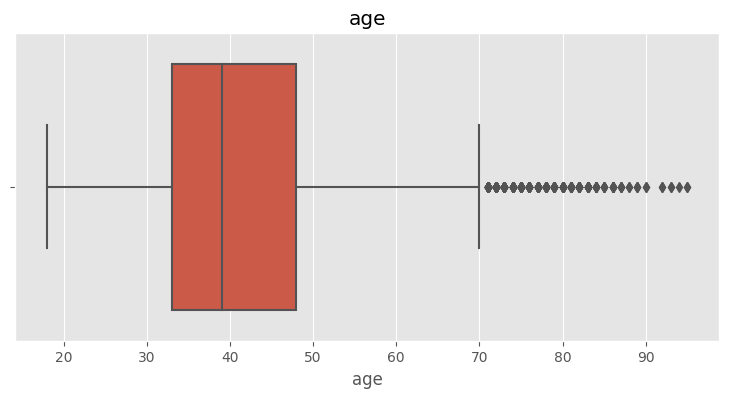

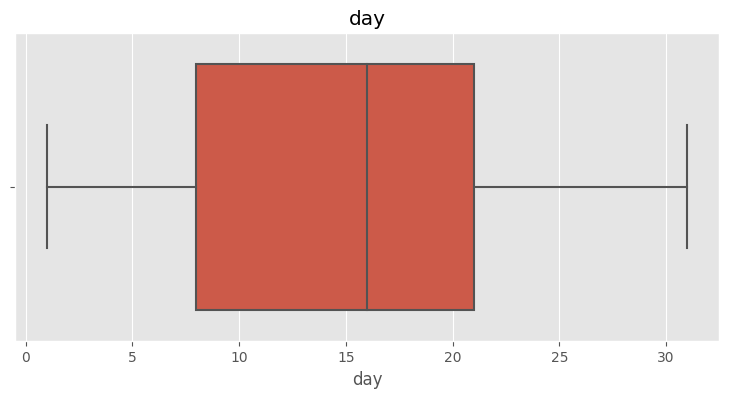

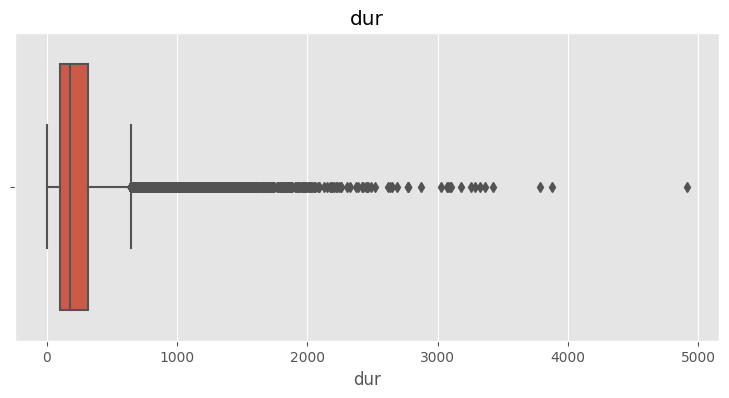

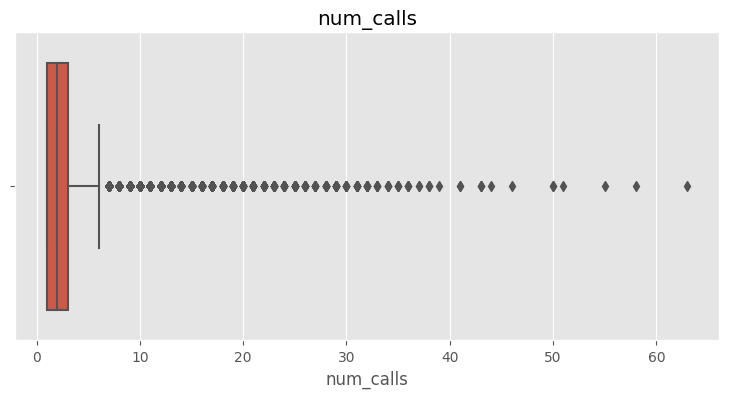

In [36]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

In [37]:
len(num_var.columns)

4

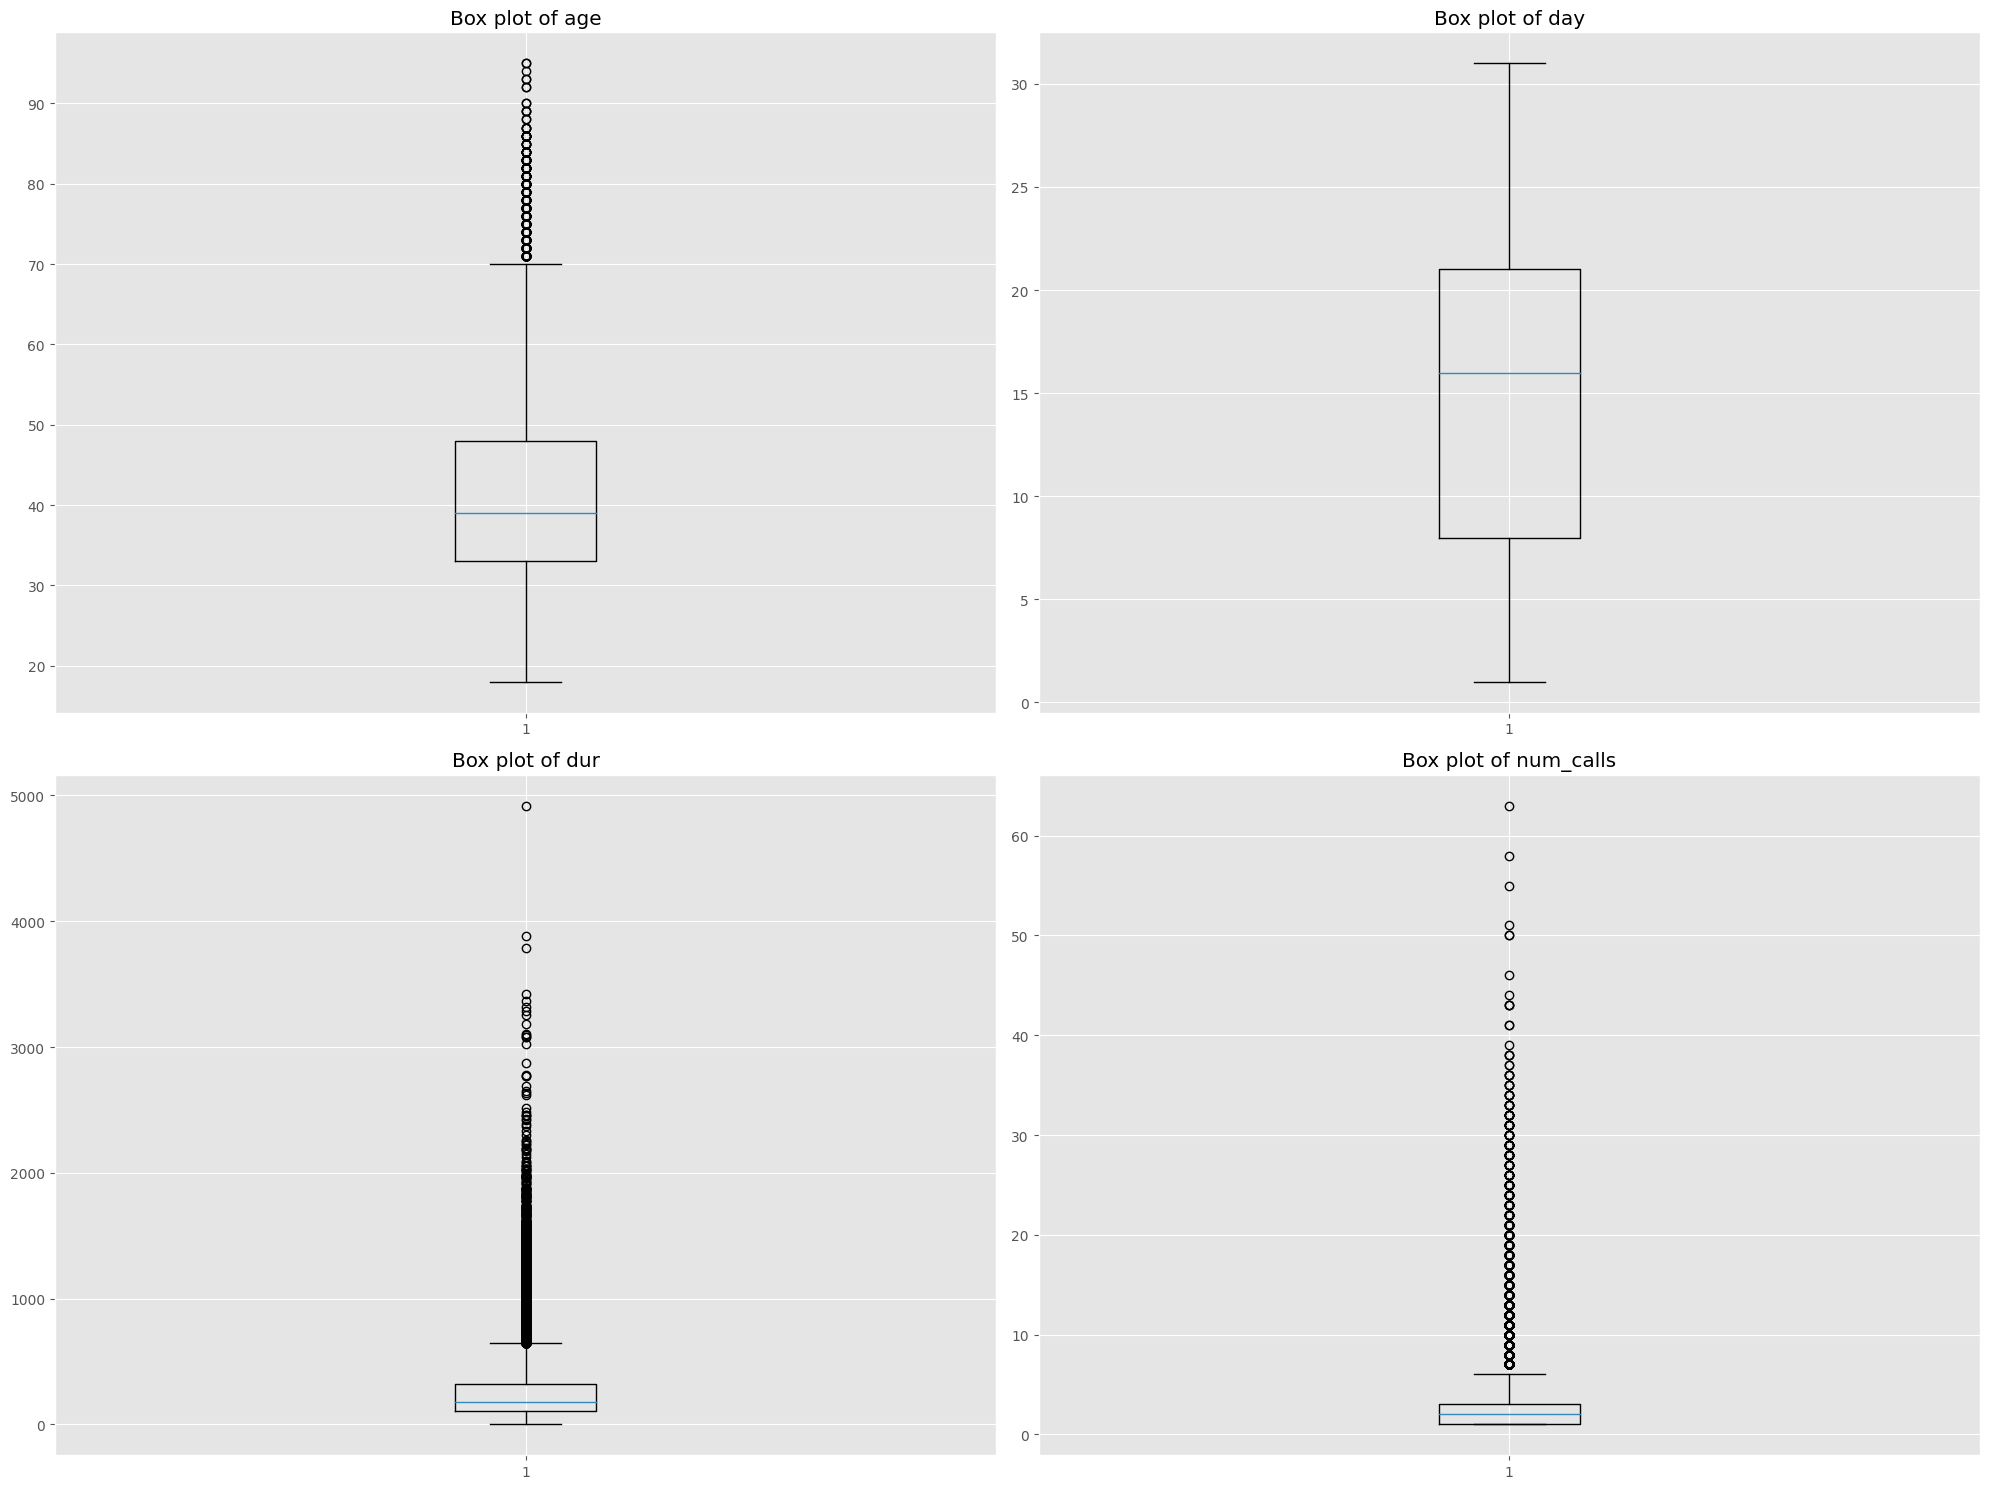

In [38]:
# Create the matrix of box plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()
for i, col in enumerate(num_var):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Box plot of {col}')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
for i in num_var:

  iqr = df[i].quantile(0.75) - df[i].quantile(0.25)              # There are outliers
  upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
  upper_threshold, lower_threshold

  df[i] = df[i].clip(lower_threshold,upper_threshold)

In [40]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


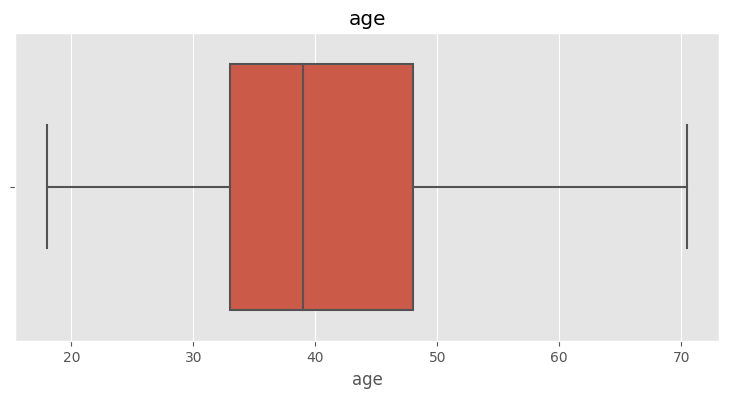

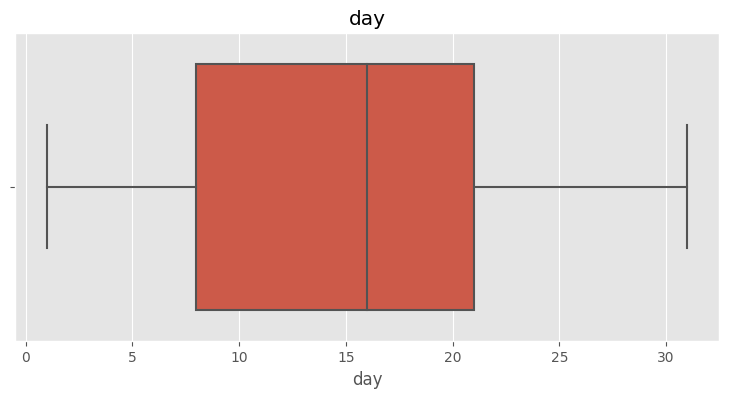

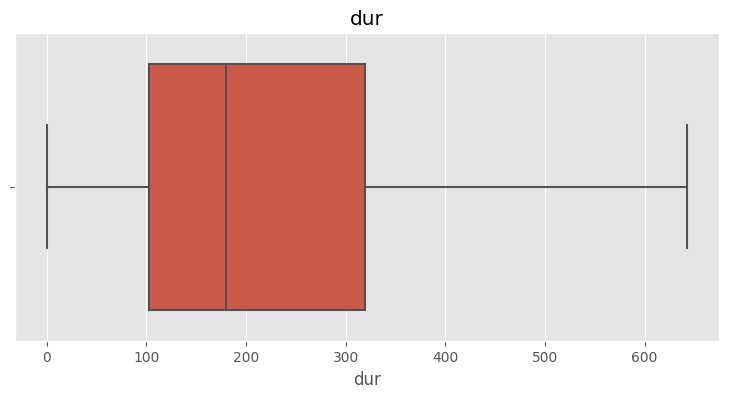

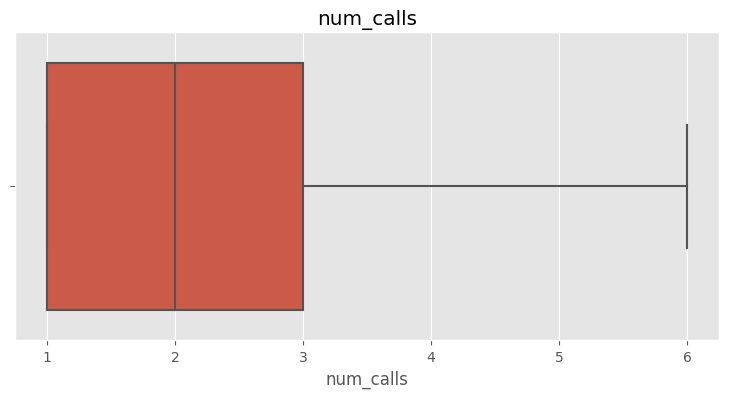

In [41]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

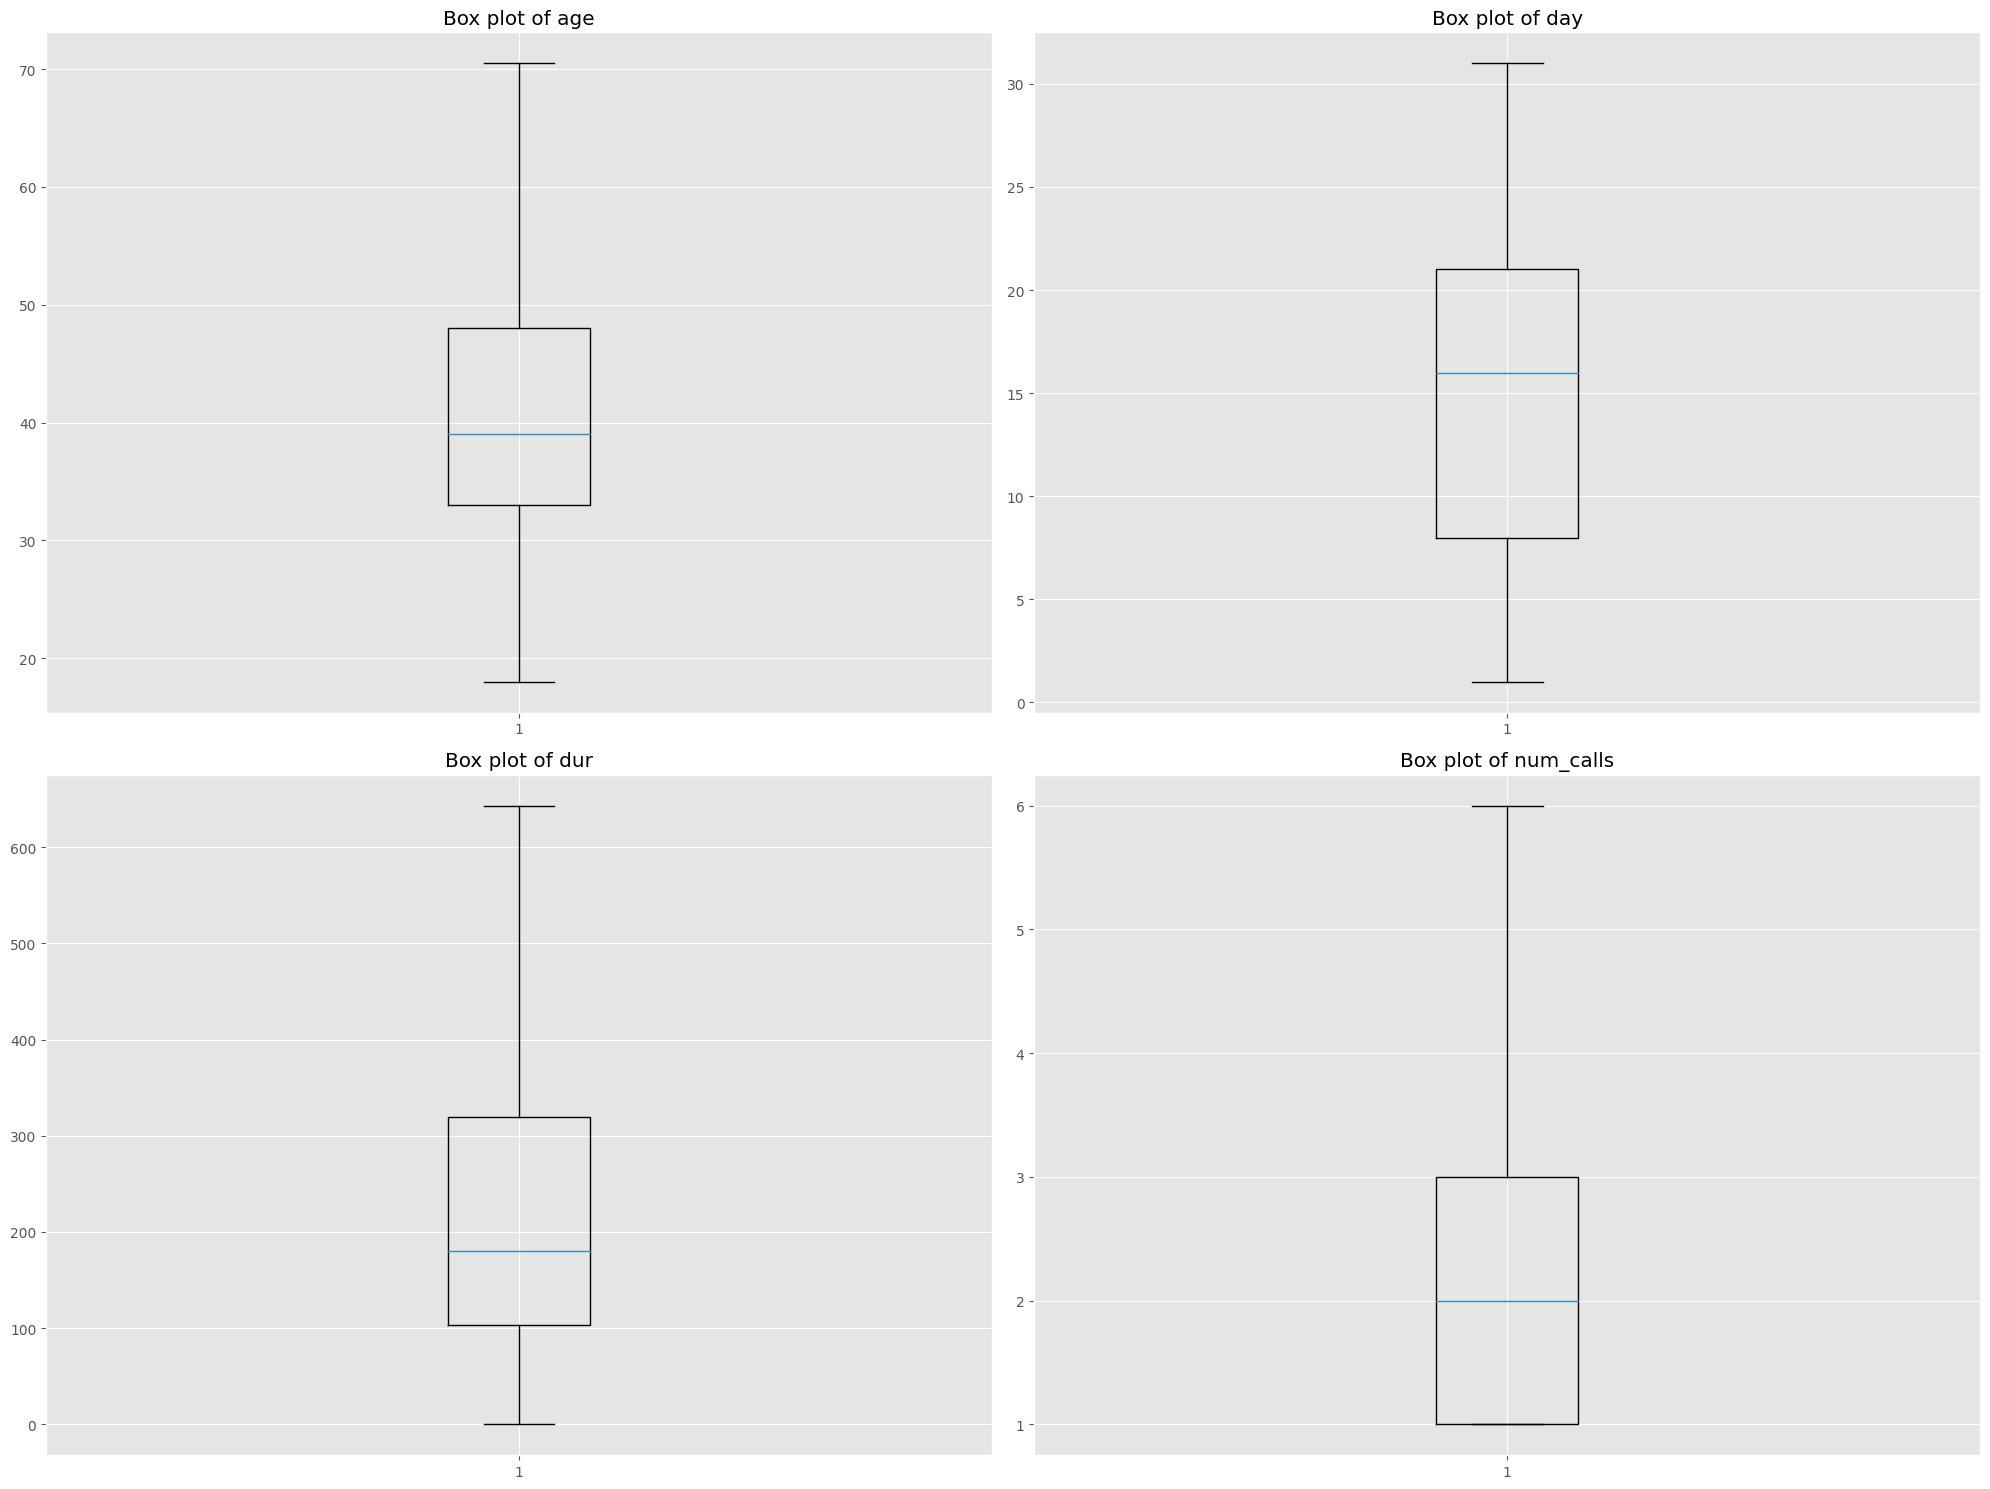

In [42]:
# Create the matrix of box plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()
for i, col in enumerate(num_var):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Box plot of {col}')

# Show the plot
plt.tight_layout()
plt.show()

## EDA

Feature Distribution Analysis

Categorical data analysis

In [47]:
cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

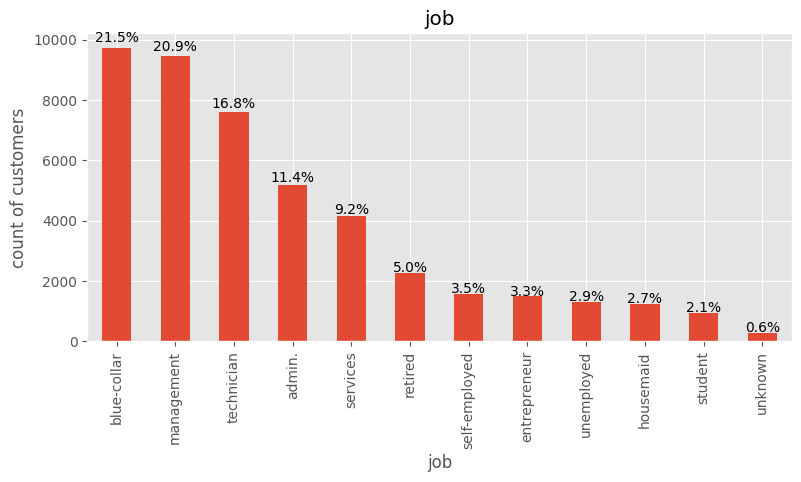

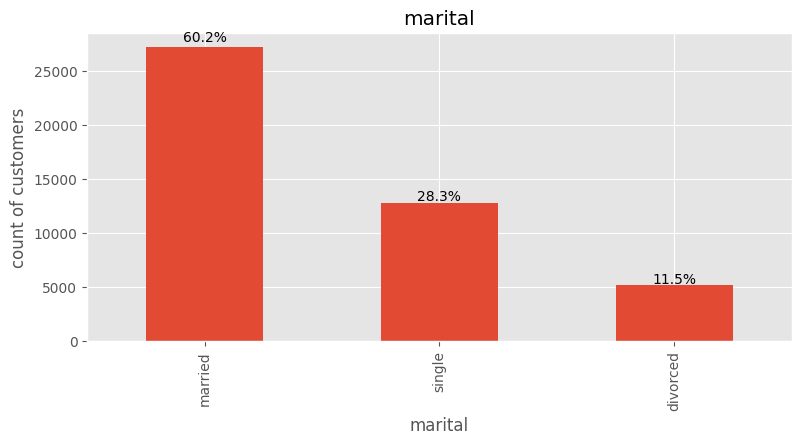

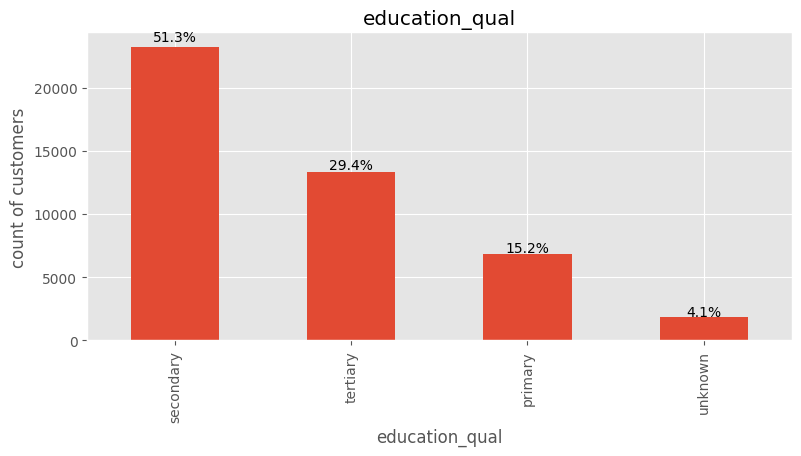

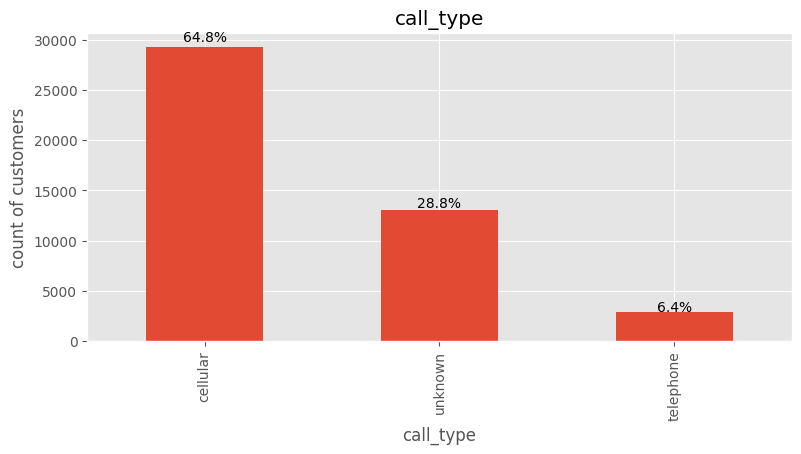

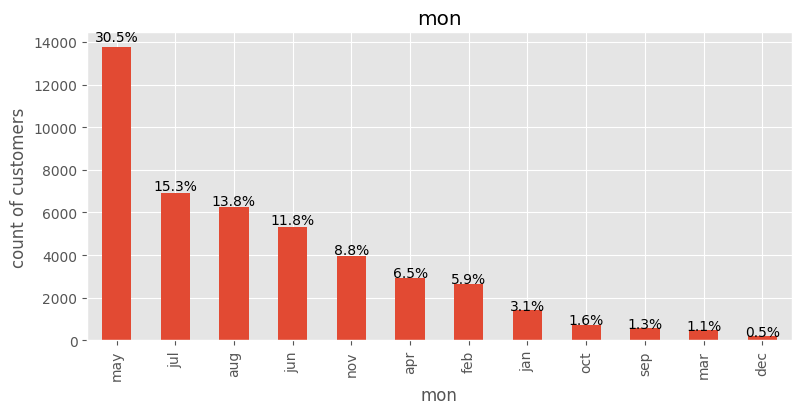

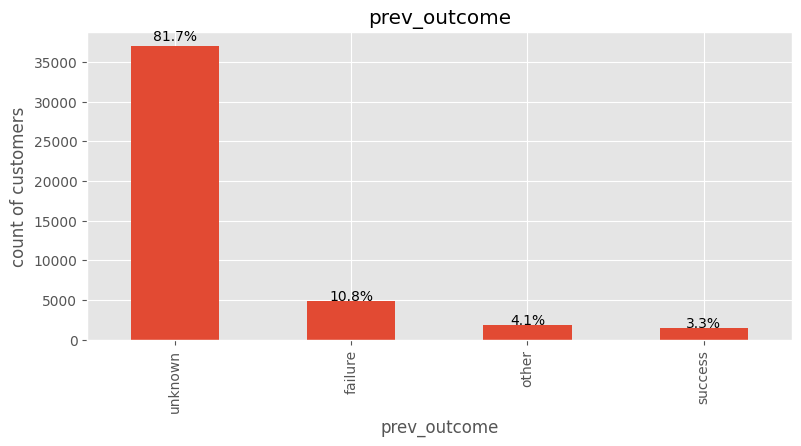

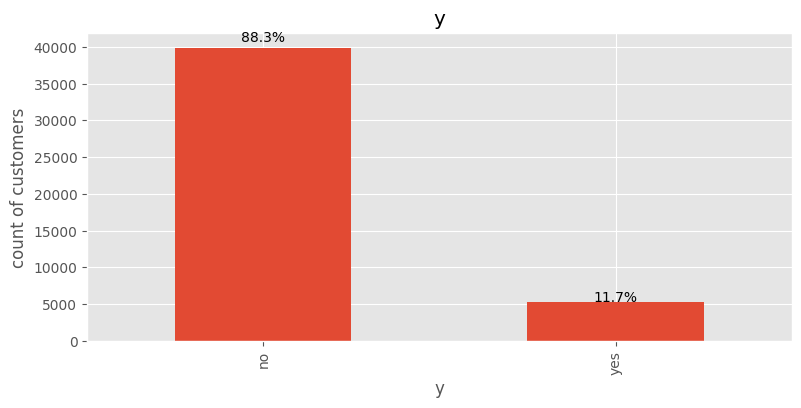

In [48]:
%matplotlib inline
#plt.style.use('ggplot')
import matplotlib.pyplot as plt

for column in cat_var:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('count of customers')
  plt.title(column)

  total = sum([p.get_height() for p in ax.patches])
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{height/total:.1%}', (x+ width/2, y + height*1.02), ha = 'center')

In [49]:
# From categorical feature distribustion analysis we came to the conclusion that we have to impute below values
impute=['job','education_qual']
for column in impute:
  mode = df[column].mode()[0]
  df[column] = df[column].replace('unknown',mode)

Numerical data analysis

In [50]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

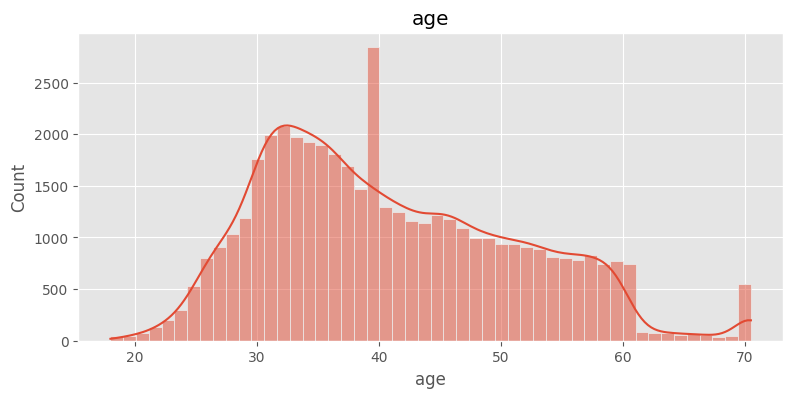

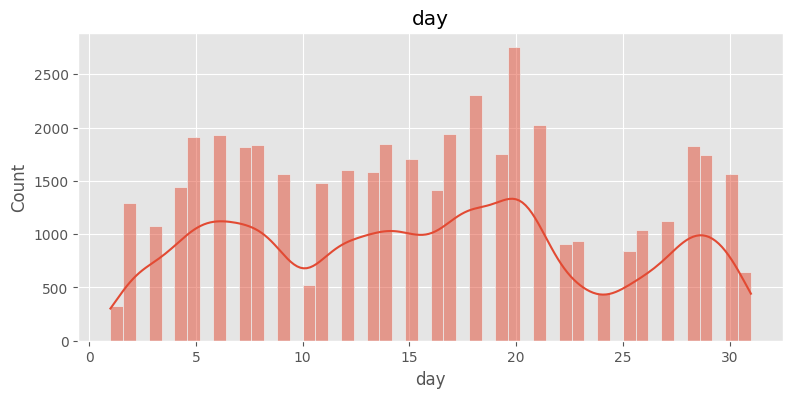

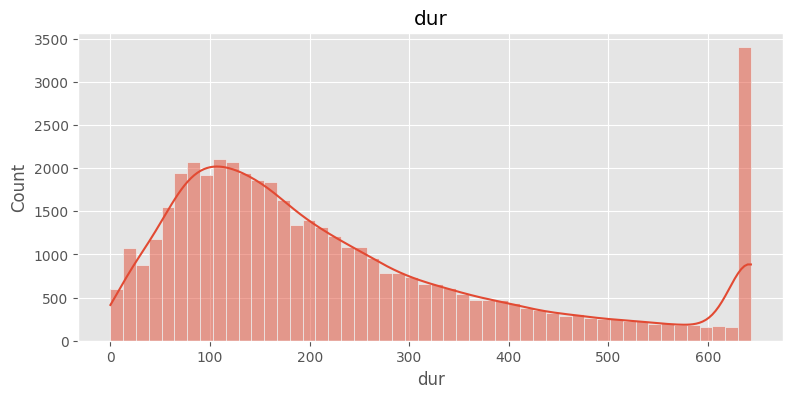

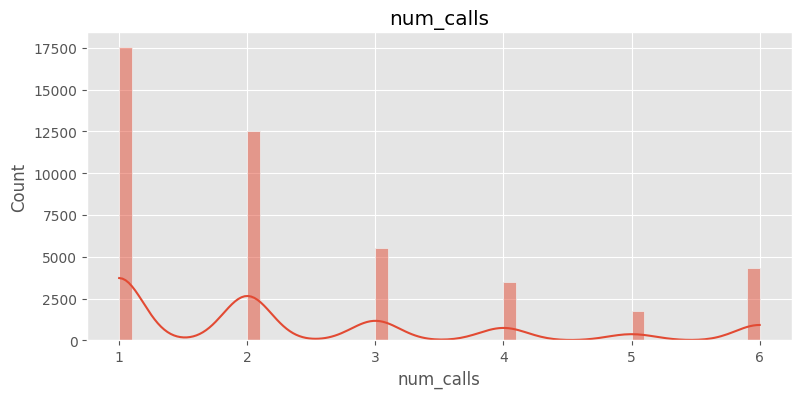

In [51]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.histplot(data=df,x=column,kde=True,bins =50)
  plt.title(column)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'num_calls'}>]], dtype=object)

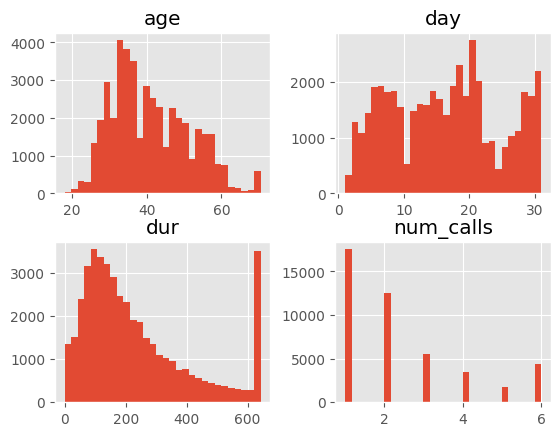

In [52]:
df.hist(bins=30)

#### Target variable analysis

In [53]:
tar_var.columns

Index(['y'], dtype='object')

In [54]:
df["y"] = df["y"].map({"yes" : 1, "no" : 0})

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


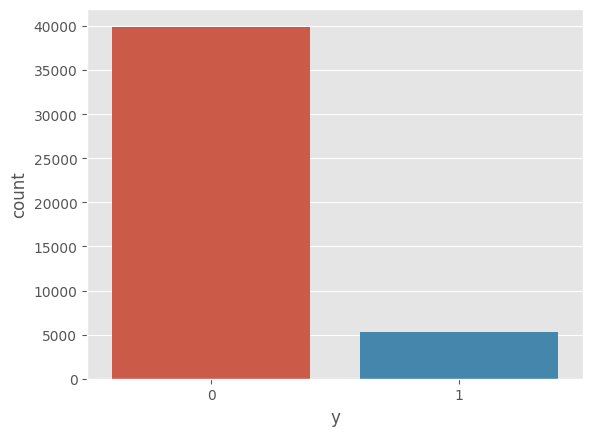

In [55]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
sns.countplot(x='y', data=df)
plt.show()

We came to conclusion that given data is imbalanced data

## Feature vs target variable

In [56]:
cat_var = df.select_dtypes(include=['object']).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


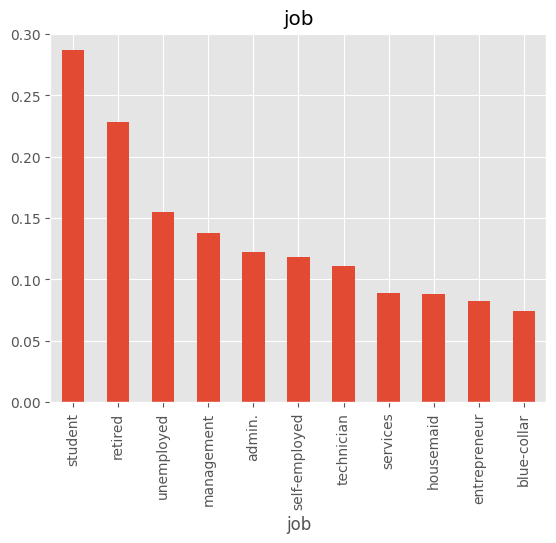

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.074067
Name: y, dtype: float64


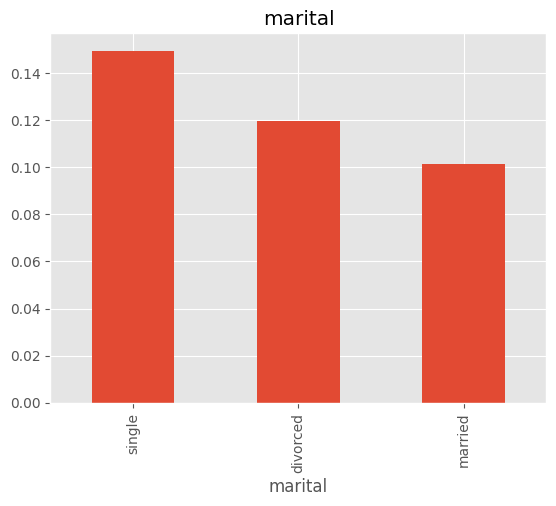

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: y, dtype: float64


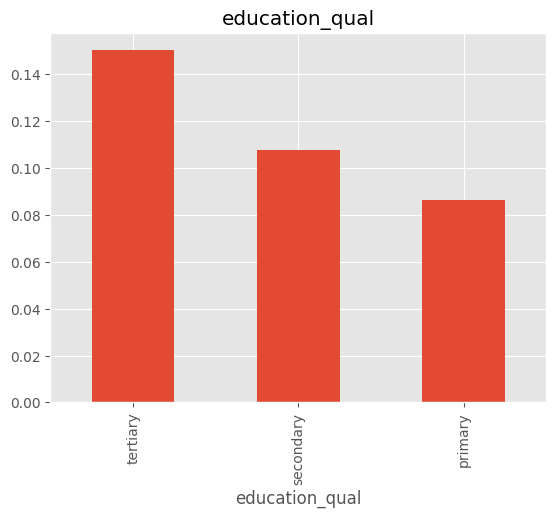

education_qual
tertiary     0.150086
secondary    0.107838
primary      0.086277
Name: y, dtype: float64


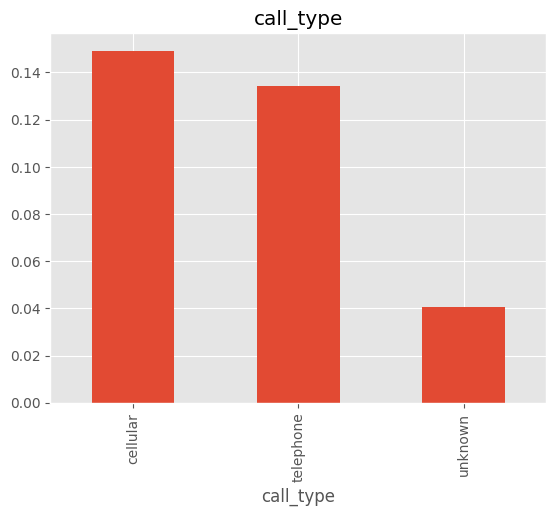

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y, dtype: float64


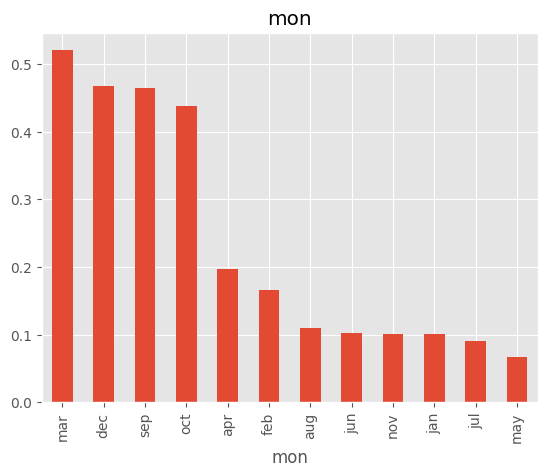

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: y, dtype: float64


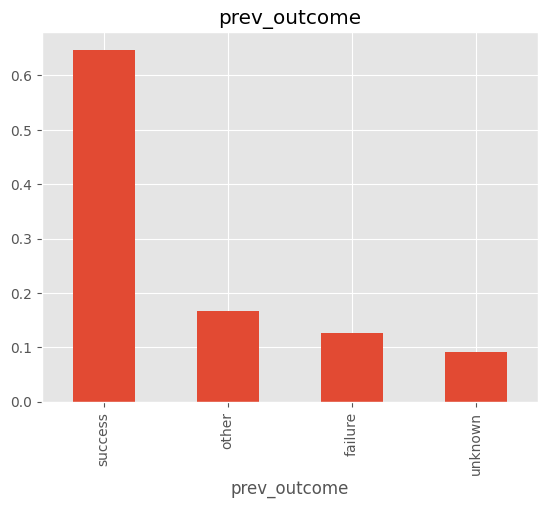

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: y, dtype: float64


In [57]:
for i in cat_var:
    df.groupby(i)['y'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i) # add a title to each plot
    plt.show()  # create a new figure for each plot
    print(df.groupby(i)['y'].mean().sort_values(ascending=False))

from above analysis we came to conclusion that features job,marital,education_qual has linear pattern withrespect to target variable

So we can go with label encoding for these features

#### Correlation

In [58]:
corr_y = df.corr()['y']
print(corr_y)

age          0.018946
day         -0.028371
dur          0.390642
num_calls   -0.084067
y            1.000000
Name: y, dtype: float64


In [59]:
corr_y = corr_y[:-1].abs().sort_values(ascending = False)
corr_y

dur          0.390642
num_calls    0.084067
day          0.028371
age          0.018946
Name: y, dtype: float64

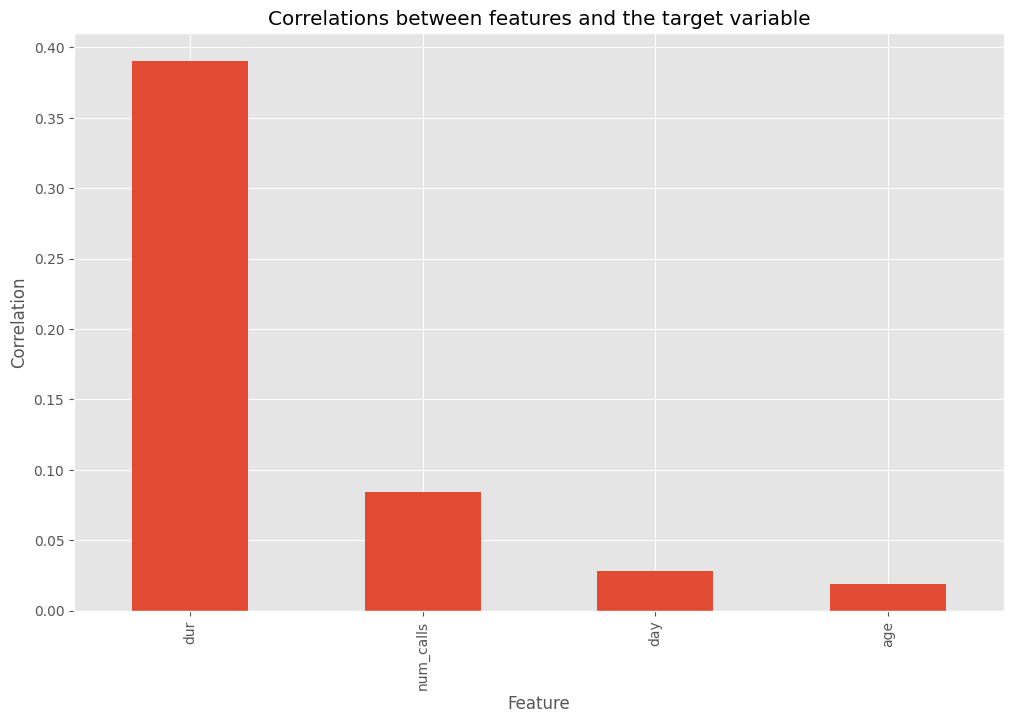

In [60]:
plt.figure(figsize=(12,7.5))
corr_y.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations between features and the target variable')
plt.show()

##**Step 3 : Preprocessing data ( Reading the data for ML purposes )**

### Encoding

In [61]:
dfT = df

dfT["job"] = dfT["job"].map({'blue-collar': 0,'entrepreneur': 1, 'housemaid':2, 'services' :3, 'technician' :4, 'self-employed':5, 'admin.' :6, 'management' :7, 'unemployed':8, 'retired':9, 'student':10 })
dfT["marital"] = dfT["marital"].map({'married':0, 'divorced':1, 'single':2 })
dfT["education_qual"] = dfT["education_qual"].map({'primary':0, 'secondary':1, 'tertiary':2 })

#one hot encoding
dfT = pd.get_dummies(dfT,columns = ["call_type"])
dfT = pd.get_dummies(dfT,columns = ["mon"])
dfT = pd.get_dummies(dfT,columns = ["prev_outcome"])

In [62]:
dfT

,age,job,marital,education_qual,day,dur,num_calls,y,call_type_cellular,call_type_telephone,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7,0,2,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,4,2,1,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,1,0,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,0,1,5,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,2,1,5,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,2,17,643,3,1,1,0,...,0,0,0,1,0,0,0,0,0,1
45207,70.5,9,1,0,17,456,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,70.5,9,0,1,17,643,5,1,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57.0,0,0,1,17,508,4,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### Splitting

Seperating feature & target variable

In [63]:
import numpy as np

Y = np.array(dfT['y']) # target varaibles
X = dfT.drop('y', axis = 1) # features

# # # Saving feature names for later use
feature_list = list(X.columns) # feature labels

In [64]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
X

,age,job,marital,education_qual,day,dur,num_calls,call_type_cellular,call_type_telephone,call_type_unknown,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7,0,2,5,261,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,4,2,1,5,151,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,33.0,1,0,1,5,76,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,0,1,5,92,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,2,1,5,198,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,2,17,643,3,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,70.5,9,1,0,17,456,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,70.5,9,0,1,17,643,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57.0,0,0,1,17,508,4,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
feature_list

['age',
 'job',
 'marital',
 'education_qual',
 'day',
 'dur',
 'num_calls',
 'call_type_cellular',
 'call_type_telephone',
 'call_type_unknown',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_feb',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'prev_outcome_failure',
 'prev_outcome_other',
 'prev_outcome_success',
 'prev_outcome_unknown']

In [67]:
original_feature_list = list(df.drop('y', axis = 1))
original_feature_list

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

extracting values

In [68]:
X = dfT[dfT.columns[:-1]].values 
Y = dfT['y'].values

In [69]:
X

array([[58. ,  7. ,  0. , ...,  0. ,  0. ,  0. ],
       [44. ,  4. ,  2. , ...,  0. ,  0. ,  0. ],
       [33. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [70.5,  9. ,  0. , ...,  0. ,  0. ,  1. ],
       [57. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [37. ,  1. ,  0. , ...,  0. ,  1. ,  0. ]])

In [70]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Splitting

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [77]:
x_train

array([[30.,  6.,  2., ...,  0.,  0.,  0.],
       [33.,  3.,  0., ...,  0.,  0.,  0.],
       [43.,  4.,  0., ...,  0.,  0.,  0.],
       ...,
       [32.,  7.,  2., ...,  0.,  0.,  0.],
       [45.,  4.,  1., ...,  0.,  0.,  0.],
       [51.,  3.,  0., ...,  0.,  0.,  0.]])

In [78]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [79]:
x_train.shape, x_test.shape

((36164, 26), (9041, 26))

### 4) Sampling data

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

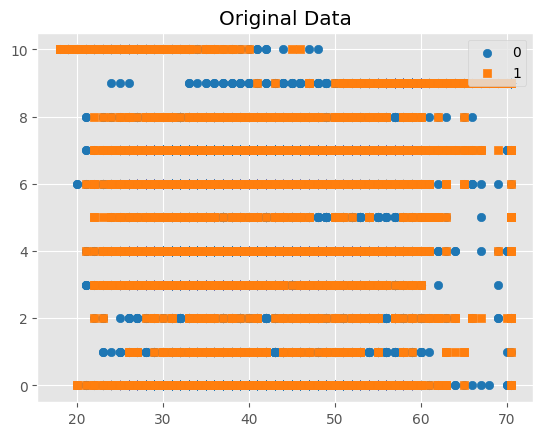

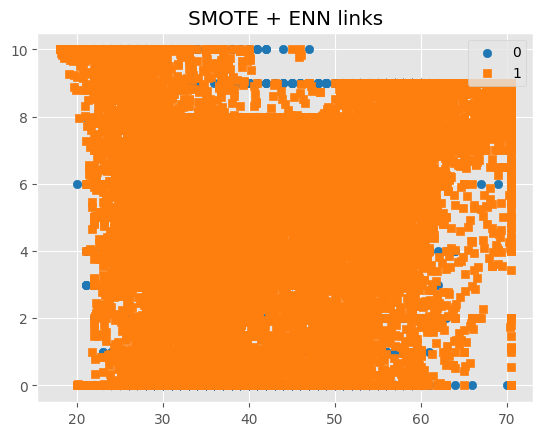

In [82]:
from imblearn.combine import SMOTEENN                   

plot_2d_space(x_train, y_train, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [83]:
len(X_smt),len(y_smt)

(53464, 53464)

### Scaling data

In [84]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train_scaled = std.fit_transform(X_smt)
x_test_scaled = std.transform(x_test)

##**Step 4 : Model building ( Constructing the ML Algos )**

### RandomForestClassifier

In [85]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')

# Train the model on training data
rf.fit(x_train_scaled,y_smt);

In [86]:
y_pred_rfc = rf.predict(x_test_scaled)

In [87]:
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1])

0.9999991671057209

In [89]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
y_pred = rf.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("auroc:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9994469638314346
F1 score: 0.9976292081555239
auroc: 0.9996870697208662


In [90]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("F1 score:", f1_score(y_test, y_pred_rfc))
print("auroc:", roc_auc_score(y_test, y_pred_rfc))

Accuracy: 0.9994469638314346
F1 score: 0.9976292081555239
auroc: 0.9996870697208662


In [91]:
import numpy as np

y_pred_rfc = np.array(y_pred_rfc)
count_of_1 = np.count_nonzero(y_pred_rfc == 1)
count_of_0 = np.count_nonzero(y_pred_rfc == 0)
print(count_of_1, count_of_0)
len(y_pred_rfc)

1057 7984


9041

Confusion matrix:
 [[7984    5]
 [   0 1052]]


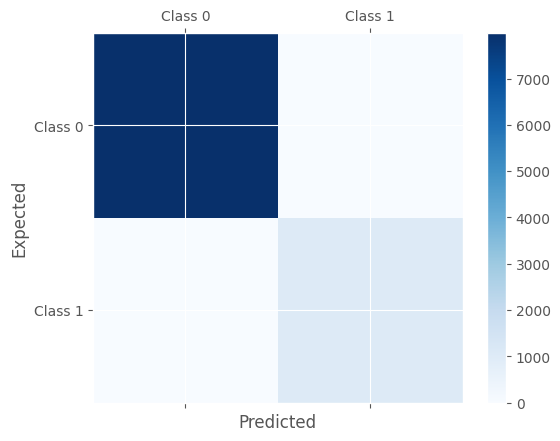

In [92]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()                                                                       # This only for proof

In [93]:
from sklearn.model_selection import cross_val_score

# perform 5-fold cross-validation
scores = cross_val_score(rf, x_train_scaled,y_smt, cv=5)

# get the mean and standard deviation of the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())


Cross-validation scores: [1.         0.99990648 1.         1.         1.        ]
Mean cross-validation score: 0.9999812961750678
Standard deviation of cross-validation scores: 3.740764986441825e-05


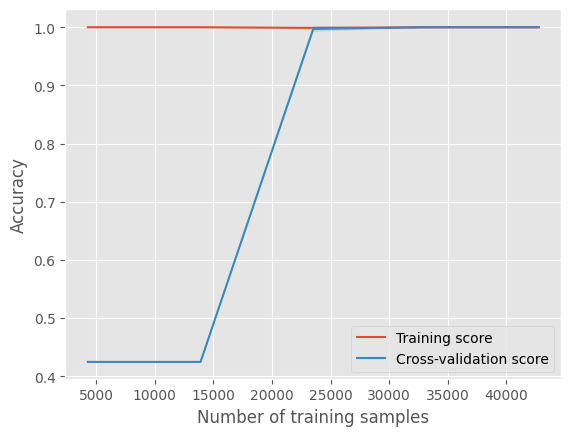

In [94]:
from sklearn.model_selection import learning_curve
import numpy as np

# create learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, x_train_scaled,y_smt, cv=5)

# calculate mean and standard deviation for training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# calculate mean and standard deviation for test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Feature Importance

In [95]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: call_type_cellular   Importance: 0.44
Variable: dur                  Importance: 0.23
Variable: call_type_telephone  Importance: 0.08
Variable: prev_outcome_unknown Importance: 0.08
Variable: mon_apr              Importance: 0.05
Variable: mon_nov              Importance: 0.03
Variable: job                  Importance: 0.02
Variable: education_qual       Importance: 0.02
Variable: marital              Importance: 0.01
Variable: num_calls            Importance: 0.01
Variable: mon_dec              Importance: 0.01
Variable: mon_jun              Importance: 0.01
Variable: age                  Importance: 0.0
Variable: day                  Importance: 0.0
Variable: call_type_unknown    Importance: 0.0
Variable: mon_aug              Importance: 0.0
Variable: mon_feb              Importance: 0.0
Variable: mon_jan              Importance: 0.0
Variable: mon_jul              Importance: 0.0
Variable: mon_mar              Importance: 0.0
Variable: mon_may              Importance: 0.0
V

### Voting Classifier

In [96]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 

model.fit(x_train_scaled,y_smt) 

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [97]:
y_pred_vc = model.predict(x_test_scaled)
y_pred_vc

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [98]:
len(y_pred_vc)

9041

In [99]:
import numpy as np

y_pred_vc = np.array(y_pred_vc)
count_of_1 = np.count_nonzero(y_pred_vc == 1)
count_of_0 = np.count_nonzero(y_pred_vc == 0)
print(count_of_1, count_of_0)
len(y_pred_vc)

1052 7989


9041

In [100]:
from sklearn.metrics import roc_auc_score
#model.score(x_test,y_test) # prediction
roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1])

1.0

In [101]:
model3 = KNeighborsClassifier(3)
model3.fit(x_train_scaled,y_smt)
roc_auc_score(y_test,model3.predict_proba(x_test_scaled)[:,1])

0.9932970453194434

In [102]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("F1 score:", f1_score(y_test, y_pred_rfc))
print("auroc:", roc_auc_score(y_test, y_pred_rfc))

Accuracy: 0.9994469638314346
F1 score: 0.9976292081555239
auroc: 0.9996870697208662


Confusion matrix:
 [[7989    0]
 [   0 1052]]


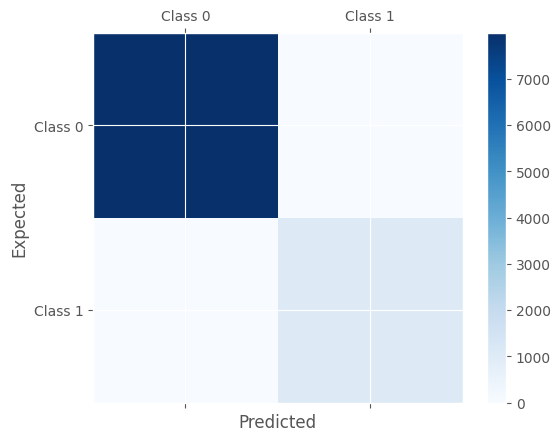

In [103]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_vc)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()                                                                       

## ALL Models

In [104]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
scores = {}
acc_list = []
f1_list = []
auroc_list = []
cv_list = []
def model(model):
    model.fit(x_train_scaled,y_smt)
    y_pred = model.predict(x_test_scaled)
    Accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy )
    f1_s = f1_score(y_test, y_pred) 
    print("F1 score:",f1_s)
    auroc = roc_auc_score(y_test, y_pred)
    print("Auroc:", auroc)
    cv_score = cross_val_score(model,x_train_scaled,y_smt,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    acc_list.append(Accuracy)
    f1_list.append(f1_s)
    auroc_list.append(auroc)
    cv_list.append(np.mean(cv_score))

In [106]:
from xgboost import XGBClassifier
clf = XGBClassifier()
model(clf)


Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [107]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [109]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [110]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
model(clf)

Accuracy: 0.9887180621612653
F1 score: 0.9532110091743119
Auroc: 0.9882511338070834
Cross Val Score: 0.995136911053866


In [111]:
from sklearn.svm import SVC
clf = SVC()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [112]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [113]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [114]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
model(clf)

Accuracy: 1.0
F1 score: 1.0
Auroc: 1.0
Cross Val Score: 1.0


In [119]:
models = ["XGBClassifier","LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC","GaussianNB","AdaBoostClassifier","GradientBoostingClassifier"]
acc_list

[1.0, 1.0, 1.0, 1.0, 0.9887180621612653, 1.0, 1.0, 1.0, 1.0]

In [116]:
scores = { "Model_Name" : models , "Accuracy_Score" : acc_list, "F1_Scores" : f1_list, "Auroc_Score": auroc_list, "Cross_val_Score": cv_list}
df1 = pd.DataFrame(scores)
df1

,Model_Name,Accuracy_Score,F1_Scores,Auroc_Score,Cross_val_Score
0,XGBClassifier,1.000000,1.000000,1.000000,1.000000
1,LogisticRegression,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
4,KNeighborsClassifier,0.988718,0.953211,0.988251,0.995137
5,SVC,1.000000,1.000000,1.000000,1.000000
6,GaussianNB,1.000000,1.000000,1.000000,1.000000
7,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
8,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Model Comparision wrt Score')

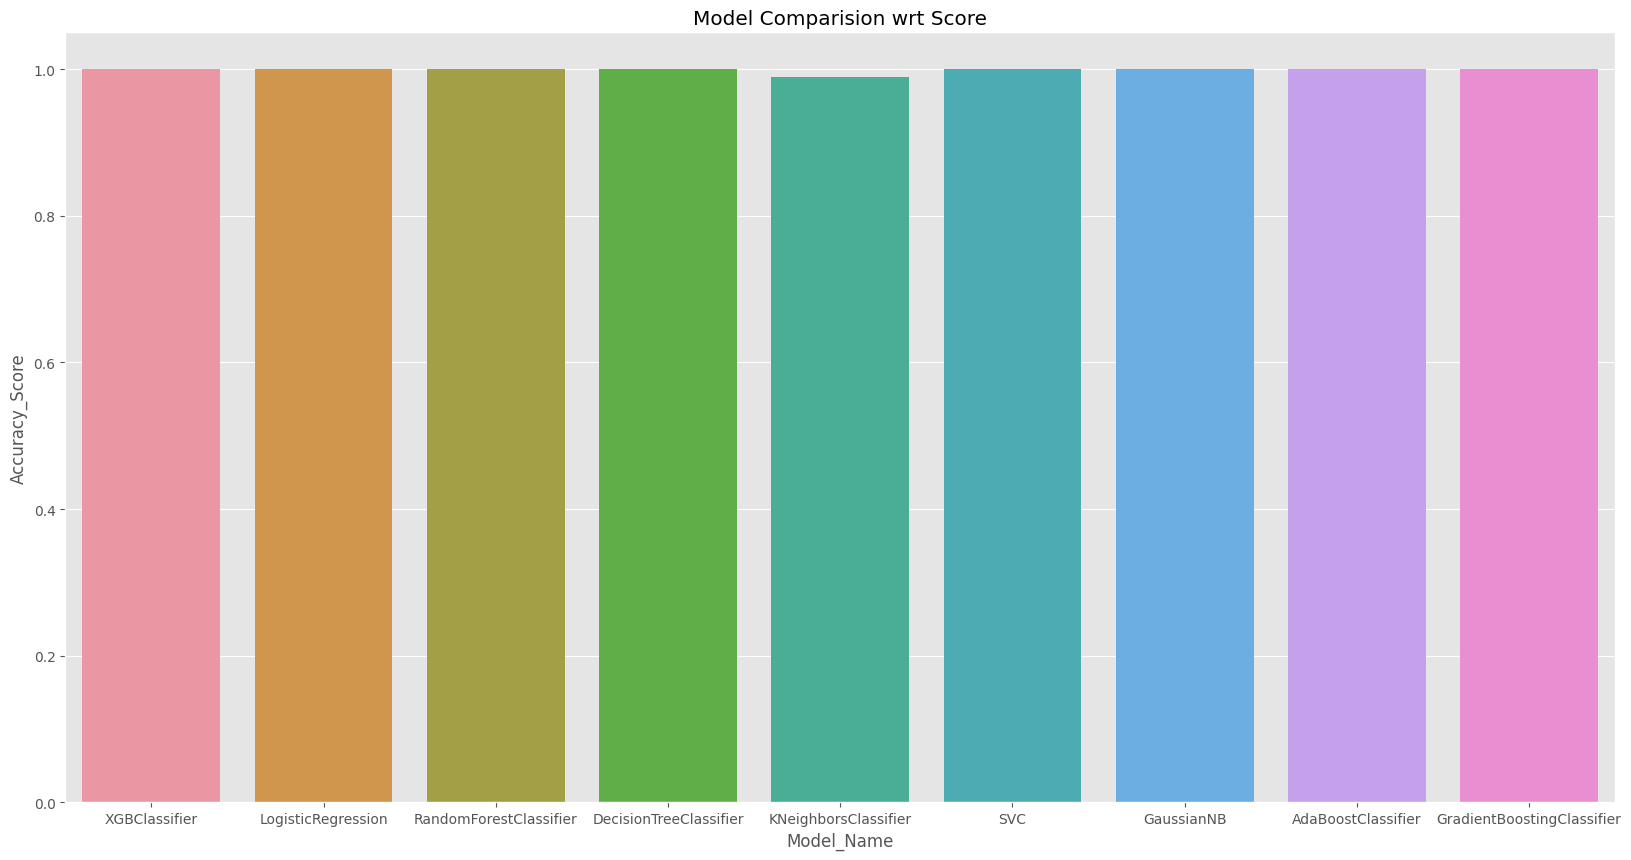

In [117]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Model_Name", y = "Accuracy_Score", data=df1)
plt.title("Model Comparision wrt Score")

Text(0.5, 1.0, 'Model Comparision wrt Cross validation')

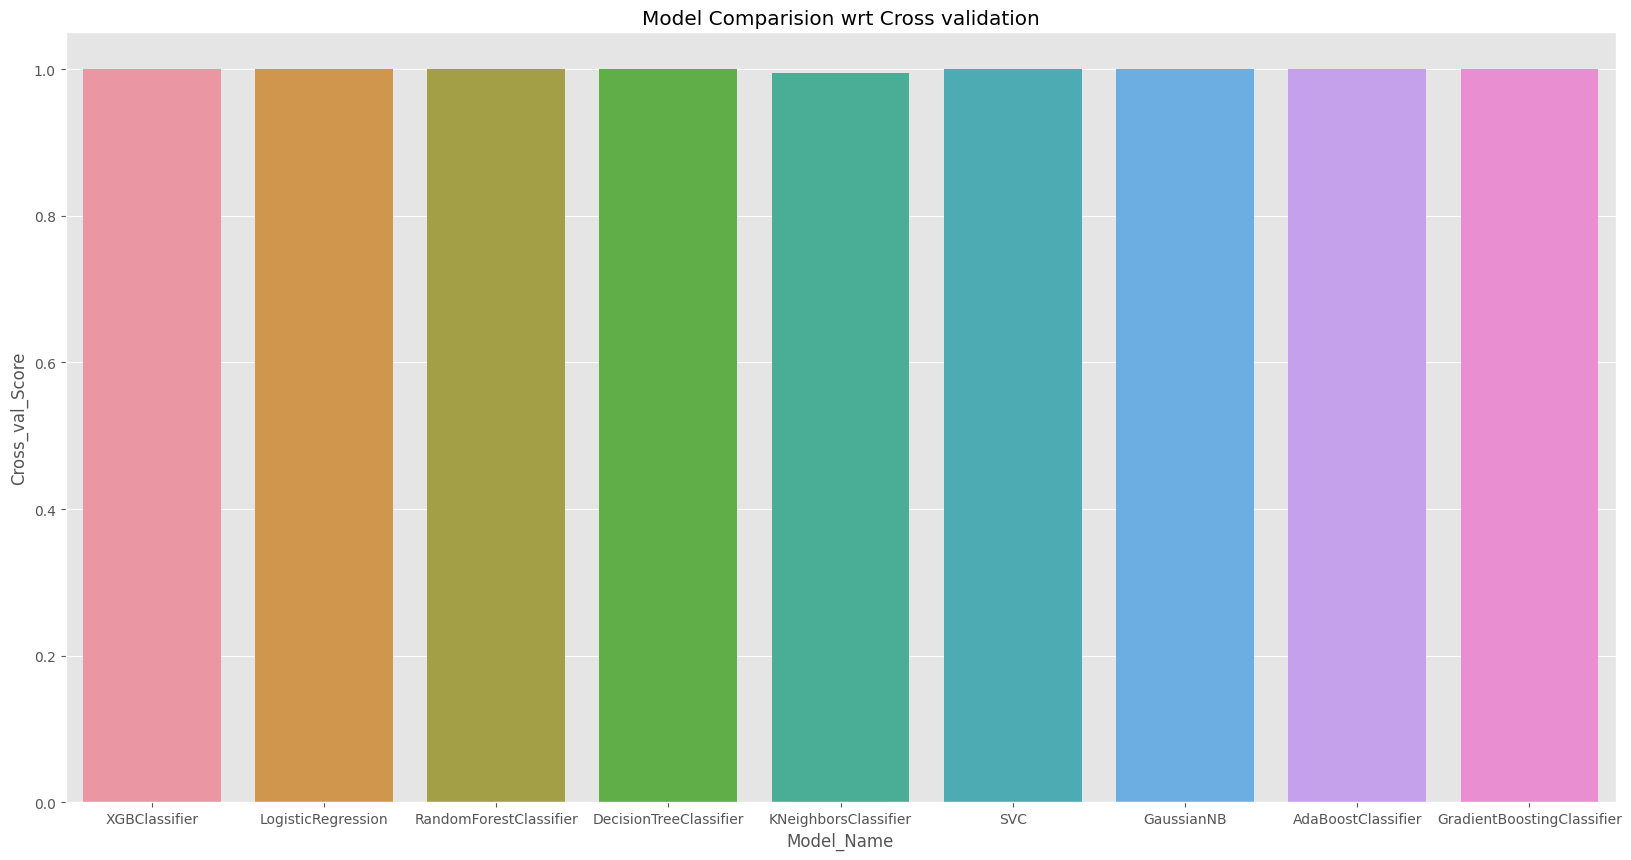

In [118]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Model_Name", y = "Cross_val_Score", data=df1)
plt.title("Model Comparision wrt Cross validation")